In [1]:
#imorting the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
#Data collection and processing
#loading the CSV data into pandas dataframe
gold_data = pd.read_csv("///home/nzangi/Downloads/youtube-dl/ML projects/Datasets/gld_price_data.csv")

In [3]:
#Read the 5 roes
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
#print the 5 last rows
gold_data.tail(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
#numbers of rows and colums
gold_data.shape

(2290, 6)

In [6]:
#get basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
#check if theere is missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
#stastical information of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
#checking the correction of the data
correlation = gold_data.corr()

<AxesSubplot:>

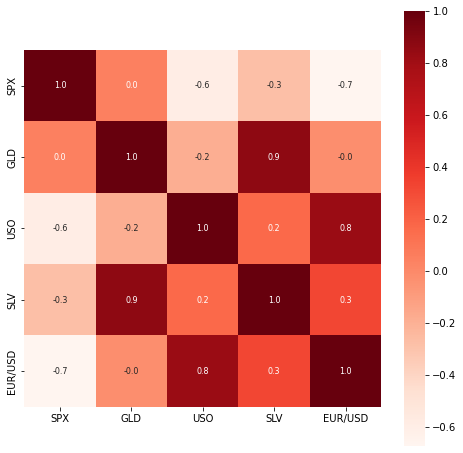

In [10]:
#construct a heat map to undertsand the correction
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Reds')

In [11]:
#correlation values
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/home/nzangi/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

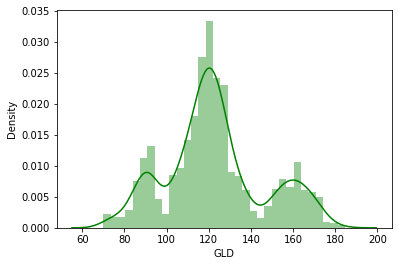

In [12]:
#check the distribution of gold price
sns.distplot(gold_data['GLD'],color='green')

In [23]:
#splitting features and target
X = gold_data.drop(['Date','GLD'], axis=1)
Y = gold_data['GLD']



,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [14]:
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [15]:
#splitting into training data and test data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 2)

In [16]:
#training model
model = RandomForestRegressor(n_estimators=100)

In [17]:
#training using trainning data
model.fit(X_train,Y_train)

RandomForestRegressor()

In [18]:
#model evalution
#prediction on test data
test_data_prediction = model.predict(X_test)

In [19]:
print(test_data_prediction)

[168.56019945  81.84569982 115.69219972 127.66630075 120.85730132
 154.91799771 150.35689892 126.1056008  117.51059893 126.08960069
 116.93880095 171.75570097 141.9893984  167.64409818 115.31909972
 117.53820049 137.80990388 170.10620091 159.9728034  159.87309915
 155.07530019 125.58690034 175.47190078 157.41560288 125.15120054
  94.05789986  77.88349988 120.38640015 119.14529936 167.52189958
  88.33590086 125.39860031  91.14140087 117.70280011 121.1187992
 136.37410069 115.56650123 115.31870073 149.44460025 107.28320071
 104.78370244  87.27859819 126.49360044 117.65099993 152.11699896
 119.61349983 108.39320006 108.26759857  93.2001004  127.26499731
  74.7716005  113.60169907 121.39179995 111.31019879 118.76349897
 120.60169931 158.52999936 169.25360029 146.84929716  85.69989869
  94.4214005   86.783999    90.39399998 119.11260076 126.39770022
 127.66690001 169.65060021 122.18669927 117.31599875  98.43710055
 168.14100192 142.93619913 132.49620246 121.20500189 121.59269964
 120.070300

In [20]:
#use of r square error
error_square = metrics.r2_score(Y_test,test_data_prediction)
print(f"The R squared error: {error_square}")

The R squared error: 0.989214073333041


In [21]:
#compare the actual values and predicacted values on graph
Y_test = list(Y_test)

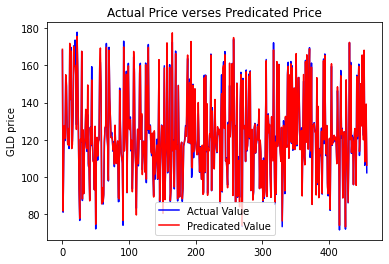

In [22]:
plt.plot(Y_test,color ='blue',label = "Actual Value")
plt.plot(test_data_prediction,color ='red',label= "Predicated Value")
plt.title("Actual Price verses Predicated Price")
plt.ylabel('GLD price')
plt.legend()
plt.show()